In [1]:
import csv
import psycopg2

In [2]:
with open('/home/faculty/millbr02/pub/un-debates-augmented-1.csv', 'r', encoding='latin-1') as f:
    csv_iter = csv.reader(f)
    db = []
    for row in csv_iter:
        db.append(row)

    # complied list of country names
    ctryNames = []
    for entry in db[1:]:
        if entry[4] not in ctryNames:
            ctryNames.append(entry[4])

    # creating the matrix
    matrix = {x: {} for x in ctryNames}
    for country in matrix:
        matrix[country] = {x:0 for x in ctryNames}
    
    # populating the matrix
    for entry in db[1:]:
        for country in ctryNames:
            num = entry[3].count(country)
            othersMentioned = matrix.get(entry[4])
            othersMentioned[country] += num

    print(matrix)

{'Seychelles': {'Seychelles': 215, 'Egypt': 2, 'Malta': 0, 'Jordan': 0, 'Algeria': 0, 'Dominica': 0, 'Tuvalu': 0, 'Gambia': 0, 'Bangladesh': 0, 'Chile': 1, 'Hungary': 0, 'Austria': 0, 'Saint Lucia': 2, 'San Marino': 0, 'China': 5, 'Turkey': 2, 'East Germany': 0, 'Botswana': 0, 'Fiji Islands': 0, 'Iran': 3, 'Cape Verde': 0, 'Congo': 0, 'Netherlands': 0, 'Italy': 0, 'Cuba': 6, 'Latvia': 0, 'Guatemala': 0, 'Qatar': 0, 'Mexico': 0, 'Paraguay': 0, 'Kenya': 3, 'Bhutan': 0, 'Libyan Arab Jamahiriya': 1, 'Indonesia': 3, 'Guinea-Bissau': 0, 'Gabon': 0, 'Mongolia': 0, 'Canada': 0, 'Bosnia and Herzegovina': 0, 'Kuwait': 8, 'Burkina Faso': 0, 'Solomon Islands': 1, 'Honduras': 0, 'Thailand': 0, 'United Kingdom': 1, 'Zambia': 3, 'Liechtenstein': 0, 'Maldives': 1, 'Ghana': 0, 'Barbados': 5, 'Pakistan': 0, 'Namibia': 37, 'Antigua and Barbuda': 0, 'Denmark': 0, 'United Arab Emirates': 1, 'Saint Vincent and the Grenadines': 1, 'Sao Tome and Principe': 0, 'Guinea': 0, 'Uzbekistan': 0, 'Tunisia': 0, 'Israe

In [3]:
%matplotlib inline
import networkx as nx
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

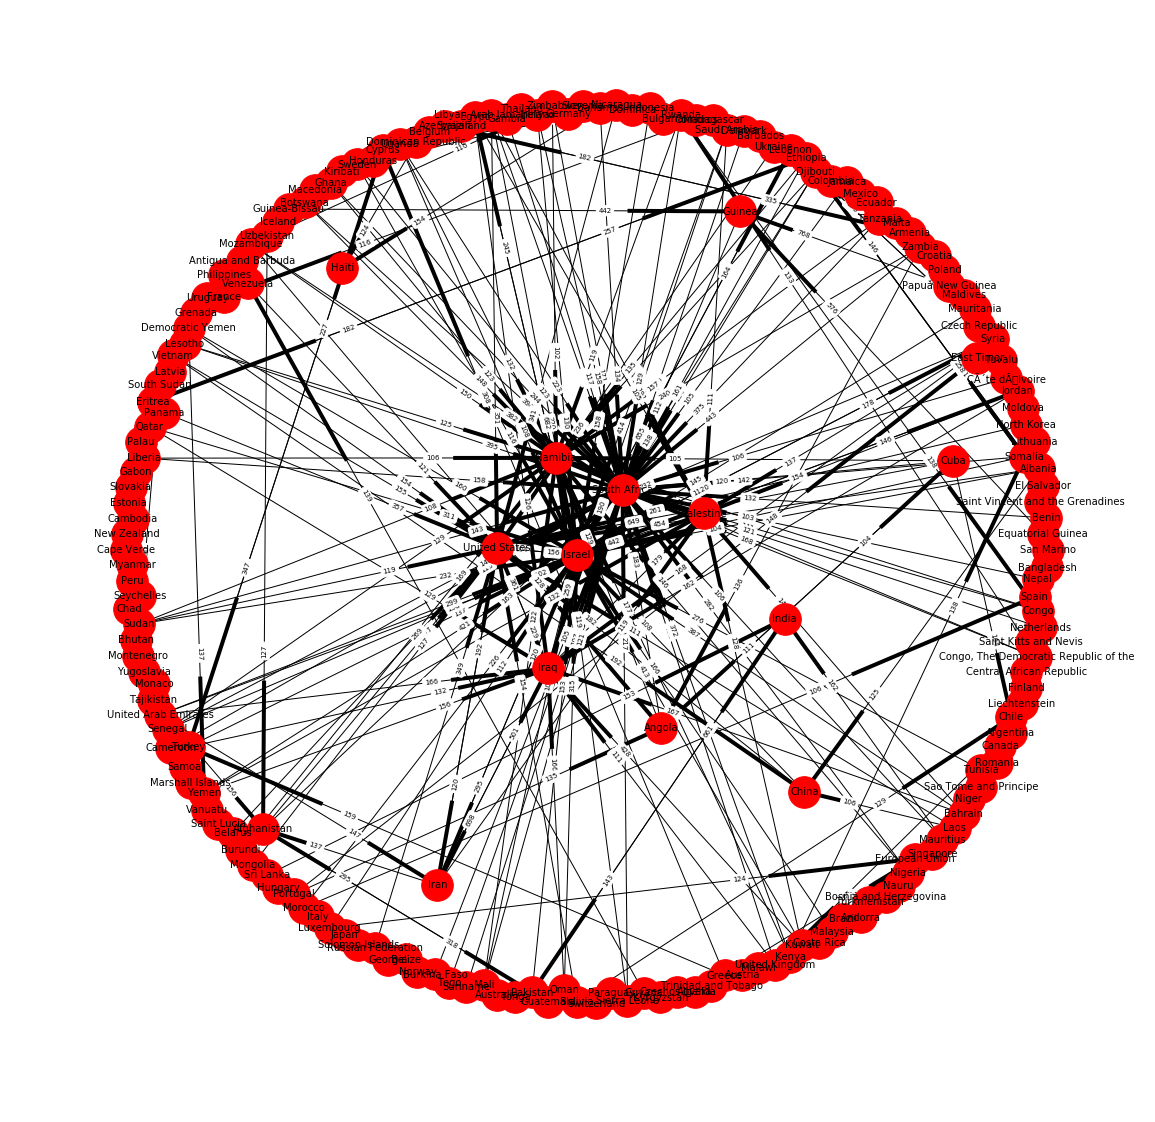

In [8]:
g = nx.MultiDiGraph()

for key in matrix:
    othersMentioned = matrix.get(key)
    for country in othersMentioned:
        if othersMentioned[country] > 100:
            g.add_edge(key,country,length=othersMentioned[country])

gfig,gax = plt.subplots(figsize=(20,20))
pos = nx.spring_layout(g,k=.3,scale=8.0,center=(0,0))

edge_labels = dict([((u,v,),d['length']) for u,v,d in g.edges(data=True)])
nx.draw_networkx_edge_labels(g,pos,edge_labels=edge_labels,label_pos=0.3,font_size= 7)
nx.draw(g,pos,ax=gax,node_size=1000,with_labels=True,font_size=10)

plt.show()
